In [ ]:
import pandas as pd

df=pd.read_csv('online_shoppers_preprocessed.csv')
df.head()

,num__Administrative,num__Administrative_Duration,num__Informational,num__Informational_Duration,num__ProductRelated,num__ProductRelated_Duration,num__BounceRates,num__ExitRates,num__PageValues,num__SpecialDay,...,num__Browser,num__Region,num__TrafficType,num__Month_sin,num__Month_cos,cat__VisitorType_New_Visitor,cat__VisitorType_Other,cat__VisitorType_Returning_Visitor,bool__Weekend,Revenue
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,-0.794017,-0.896370,-0.765321,1.288827,0.552717,0.0,0.0,1.0,0.0,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,...,-0.209237,-0.896370,-0.516347,1.288827,0.552717,0.0,0.0,1.0,0.0,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,...,-0.794017,2.433853,-0.267374,1.288827,0.552717,0.0,0.0,1.0,0.0,0
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,...,-0.209237,-0.480092,-0.018400,1.288827,0.552717,0.0,0.0,1.0,0.0,0
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,...,0.375543,-0.896370,-0.018400,1.288827,0.552717,0.0,0.0,1.0,1.0,0


/tmp/ipython-input-2389958941.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


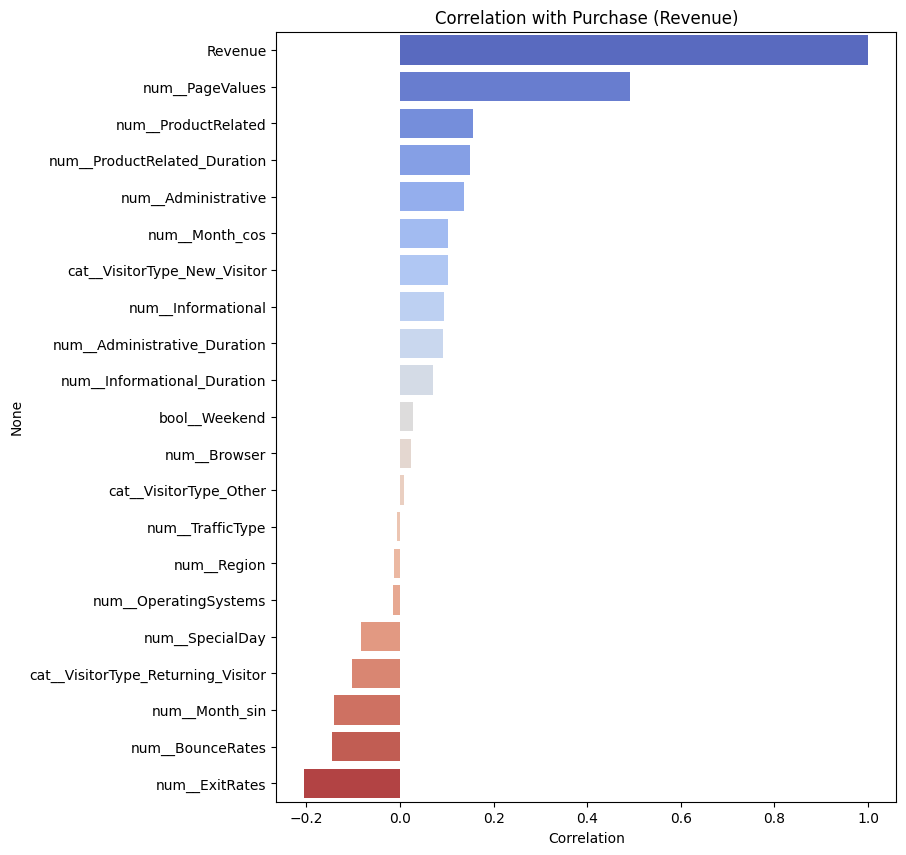

(Revenue                         1.000000
 num__PageValues                 0.491894
 num__ProductRelated             0.156042
 num__ProductRelated_Duration    0.150077
 num__Administrative             0.136330
 num__Month_cos                  0.103173
 cat__VisitorType_New_Visitor    0.102694
 num__Informational              0.093626
 num__Administrative_Duration    0.091768
 num__Informational_Duration     0.069358
 Name: Revenue, dtype: float64,
 num__Browser                          0.024052
 cat__VisitorType_Other                0.009273
 num__TrafficType                     -0.005618
 num__Region                          -0.012725
 num__OperatingSystems                -0.014927
 num__SpecialDay                      -0.083601
 cat__VisitorType_Returning_Visitor   -0.102847
 num__Month_sin                       -0.140950
 num__BounceRates                     -0.145091
 num__ExitRates                       -0.204320
 Name: Revenue, dtype: float64)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)["Revenue"].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Correlation with Purchase (Revenue)")
plt.xlabel("Correlation")
plt.show()

corr.head(10), corr.tail(10)

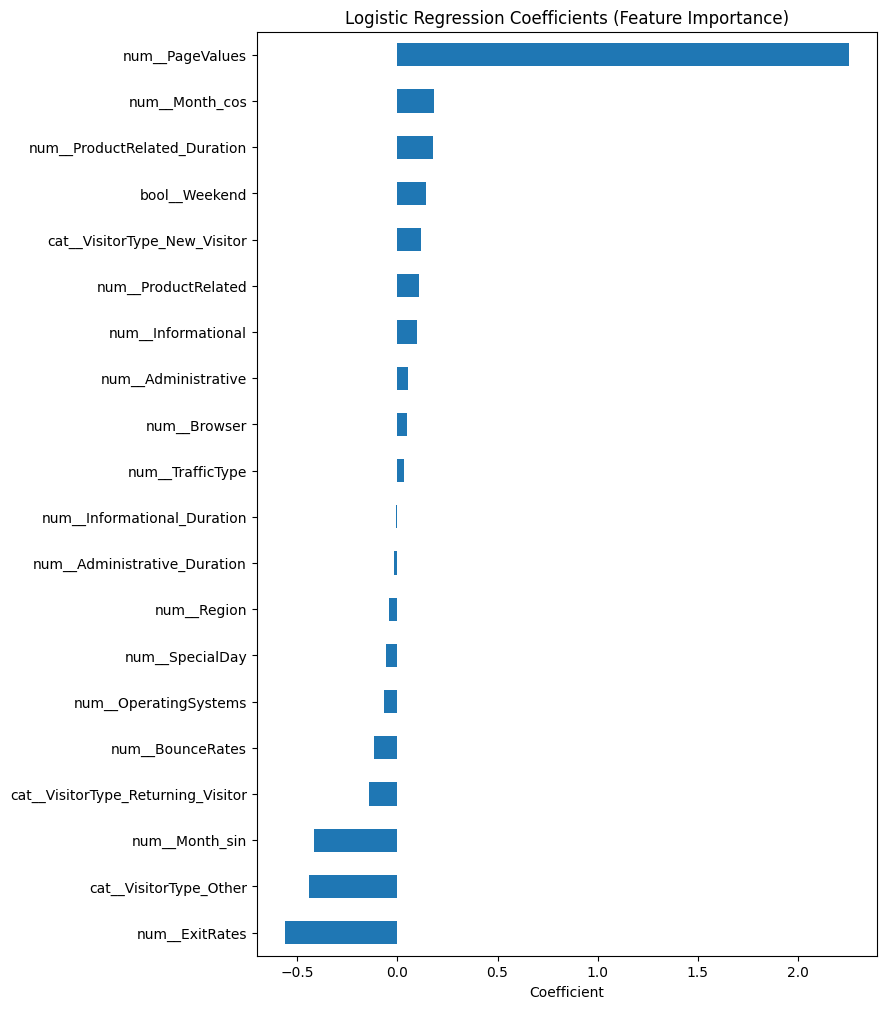

ROC-AUC: 0.9021401381078409


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

X = df.drop(columns=["Revenue"])
y = df["Revenue"]

logreg = LogisticRegression(max_iter=5000, class_weight="balanced")
logreg.fit(X, y)

coef = pd.Series(logreg.coef_[0], index=X.columns).sort_values()

plt.figure(figsize=(8,12))
coef.plot(kind="barh")
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.xlabel("Coefficient")
plt.show()

# Check performance
pred_proba = logreg.predict_proba(X)[:,1]
print("ROC-AUC:", roc_auc_score(y, pred_proba))


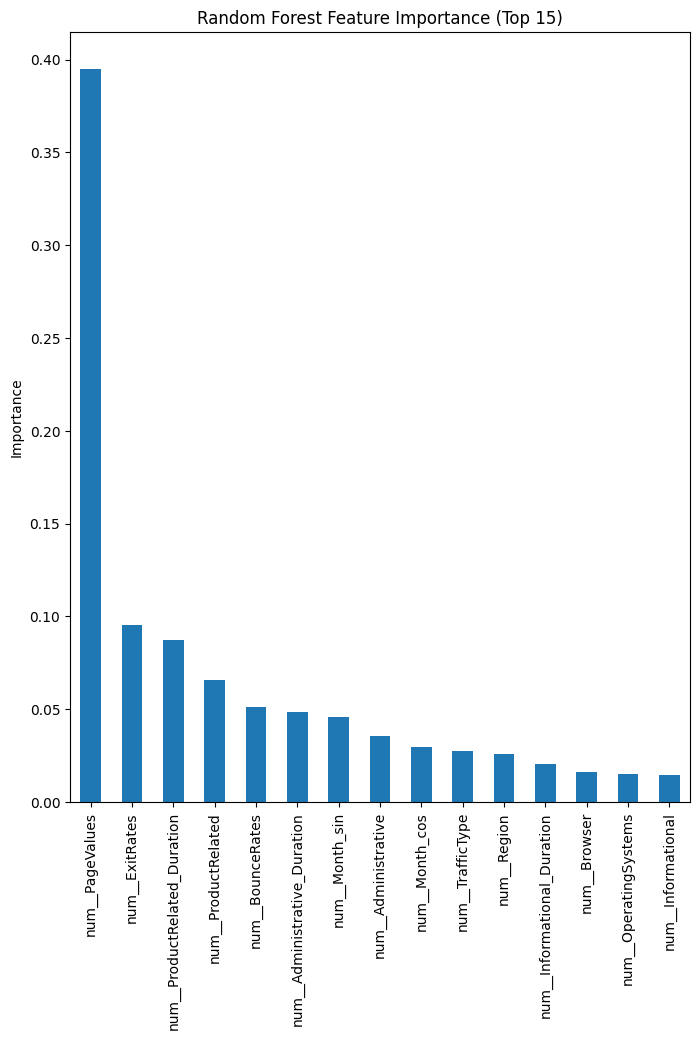

,0
num__PageValues,0.395114
num__ExitRates,0.095297
num__ProductRelated_Duration,0.087266
num__ProductRelated,0.065575
num__BounceRates,0.051184
num__Administrative_Duration,0.048466
num__Month_sin,0.045764
num__Administrative,0.035794
num__Month_cos,0.029656
num__TrafficType,0.027546


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
rf.fit(X, y)

rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,10))
rf_importance.head(15).plot(kind="bar")
plt.title("Random Forest Feature Importance (Top 15)")
plt.ylabel("Importance")
plt.show()

rf_importance.head(20)


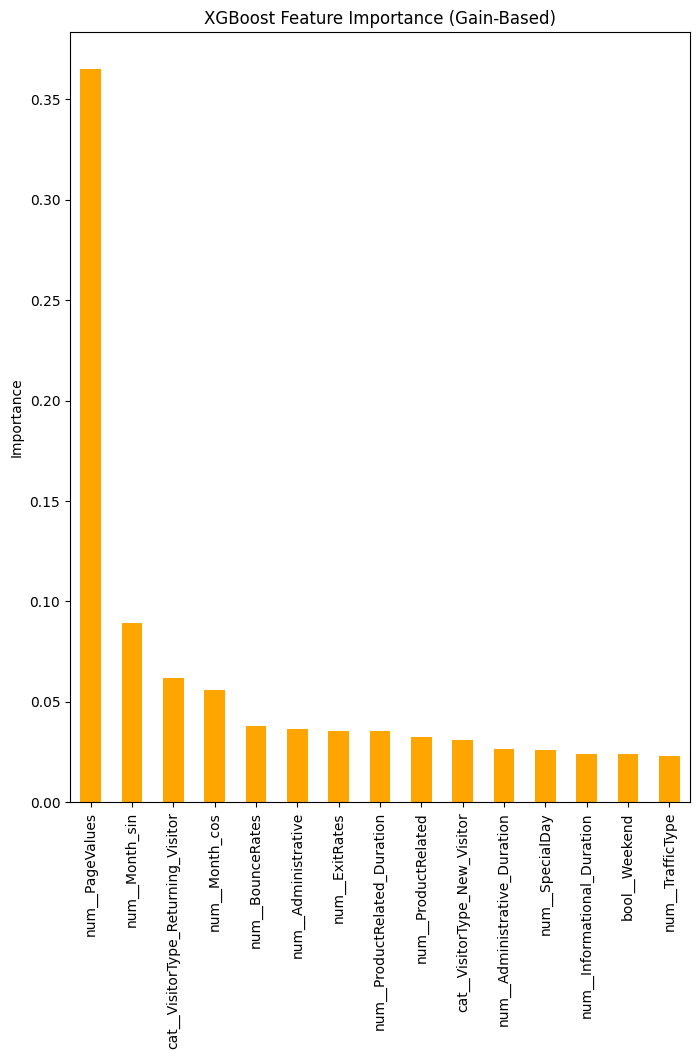

,0
num__PageValues,0.365143
num__Month_sin,0.089504
cat__VisitorType_Returning_Visitor,0.061939
num__Month_cos,0.055843
num__BounceRates,0.037984
num__Administrative,0.036341
num__ExitRates,0.035689
num__ProductRelated_Duration,0.035684
num__ProductRelated,0.032415
cat__VisitorType_New_Visitor,0.031221


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
)
xgb.fit(X, y)

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,10))
xgb_importance.head(15).plot(kind="bar", color="orange")
plt.title("XGBoost Feature Importance (Gain-Based)")
plt.ylabel("Importance")
plt.show()

xgb_importance.head(20)



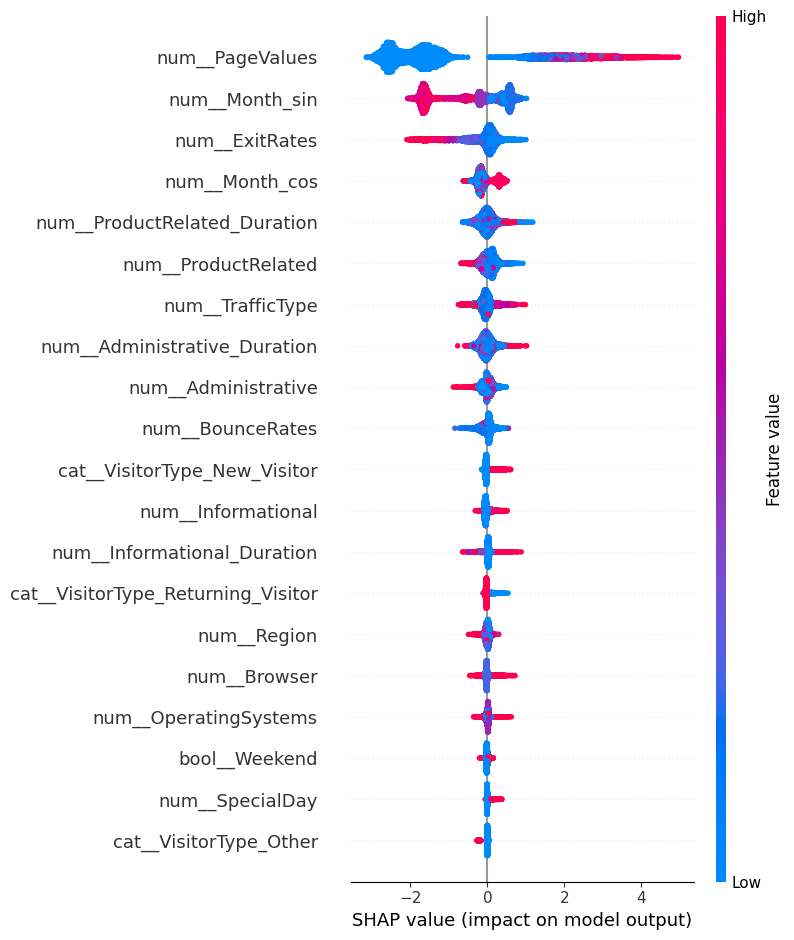

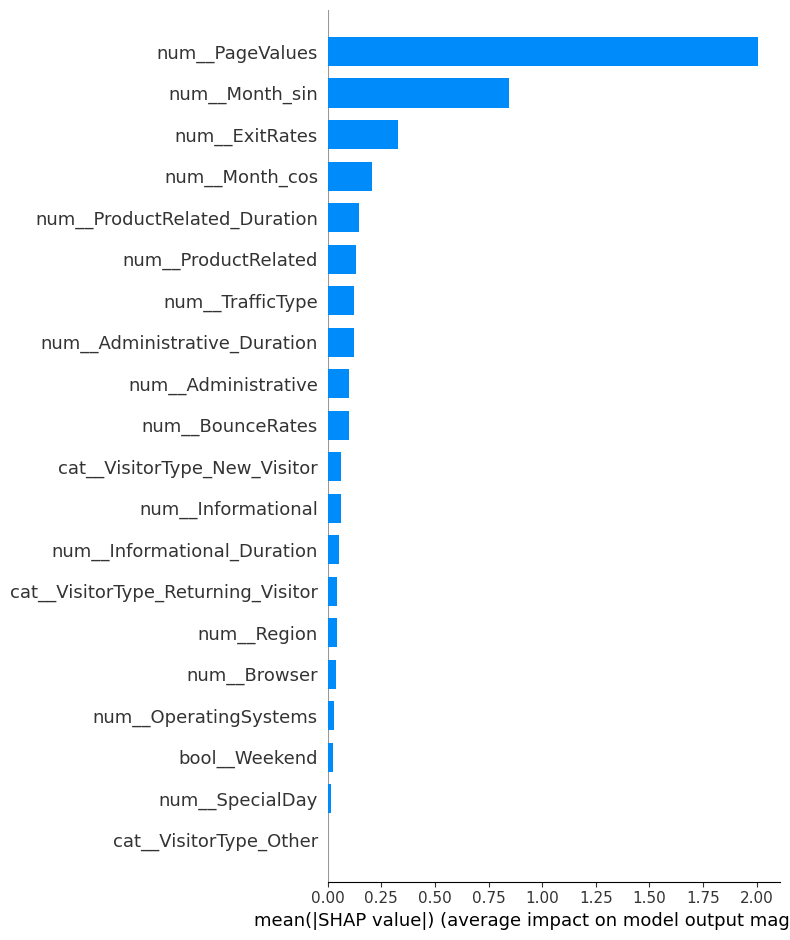

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)     # global importance
shap.summary_plot(shap_values, X, plot_type="bar")   # sorted importance
